### Imports

#### This notebook is used as a testing site

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Lasso, LassoCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler, PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [22]:
df = pd.read_csv('datasets/train.csv')
df = df.rename(str.lower, axis=1)
df.columns = [name.replace(' ', '_') if ' ' in name else name for name in df.columns]

In [23]:
df = df[df['bedroom_abvgr'] != 0]

### Polyfeatures Models

##### Feature Engineering

In [24]:
df['age'] = [df['year_built'].max()-year for year in df['year_built']]
df['age*overall_qual'] = df['age']*df['overall_qual']
df['gr_liv_area/bedroom_abvgr'] = df['gr_liv_area']/df['bedroom_abvgr']
df['since_remod/add'] = [2010-year for year in df['year_remod/add']]
df.drop(index=1712, inplace=True)

### Model

#### Features 

In [25]:
features_1= df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual', 'age*overall_qual', 'gr_liv_area/bedroom_abvgr', 'since_remod/add', '1st_flr_sf', 'garage_area']]

In [26]:
pd.get_dummies(df, columns=['kitchen_qual'])
kitchen_qual = pd.get_dummies(df['kitchen_qual'], drop_first=True)
df = pd.concat([df, kitchen_qual], axis=1)

#### r2 scores

In [27]:
X = features_1
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7839473020985814, 0.8475778511774289)

#### Metrics

In [28]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(model, X_train, y_train, cv=5).mean()
print(f'CVS = {cvs}')

NameError: name 'y_preds' is not defined

### Tuning Model 

In [ ]:
df.drop(index=1327, inplace=True)

In [32]:
df['gr_liv_area/totrms_abvgrd'] = df['gr_liv_area']/df['totrms_abvgrd']

In [33]:
df['gr_liv_area/bedroom_abvgr']

0       493.000000
1       530.500000
2       352.333333
3       481.333333
4       481.666667
           ...    
2046    576.000000
2047    861.000000
2048    637.666667
2049    400.000000
2050    601.333333
Name: gr_liv_area/bedroom_abvgr, Length: 2044, dtype: float64

In [34]:
# reordered and quantified kitchen qual

k_q_order = {'Po': 0, 'Fa': 1, 'TA': 2, 'Gd': 3, 'Ex': 4}
df['k_q'] = [k_q_order[n] for n in df['kitchen_qual']]

In [35]:
tuning = df[['gr_liv_area', 'bedroom_abvgr', 'age', 'overall_qual',
       'age*overall_qual', 'gr_liv_area/totrms_abvgrd', 'gr_liv_area/bedroom_abvgr', 'full_bath', 'since_remod/add',
       '1st_flr_sf', 'garage_area', 'k_q', 'garage_cars', 'total_bsmt_sf']]

In [39]:
tuning.shape

(2044, 14)

In [36]:
X = tuning
y = df['saleprice']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test)

(0.7961440970767417, 0.8479151054575281)

In [37]:
y_preds = model.predict(X_test)
resids = y_test-y_preds        

In [38]:
mae = mean_absolute_error(y_test, y_preds)
print(f'MAE = {mae}')
mse = mean_squared_error(y_test, y_preds, squared=False) 
print(f'RMSE = {mse}')
cvs = cross_val_score(model, X_train, y_train, cv=5)
print(f'CVS = {cvs}')

MAE = 22506.00973123842
RMSE = 31498.252421962996
CVS = [0.81165833 0.72274227 0.83407508 0.80310323 0.67225258]


* Add more features to in improve scores

In [ ]:
resids

In [ ]:
coefficents = pd.DataFrame(model.coef_, index=tuning.columns)
coefficents.rename(columns={0: 'coefficient'})

In [ ]:
df['kitchen_qual'].sort_values().value_counts()

In [ ]:
df[df['mas_vnr_area'].isnull()]

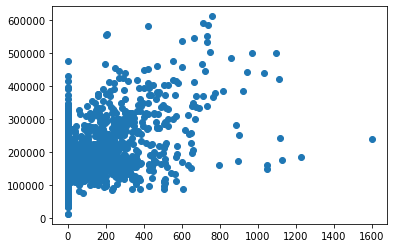

In [40]:
plt.scatter(x=df['mas_vnr_area'], y=df['saleprice'])

In [ ]:
y.mean()

In [ ]:
plt.hist(y)

In [42]:
df['year_remod/add']

0       2005
1       1997
2       2007
3       2007
4       1993
        ... 
2046    2007
2047    1950
2048    1950
2049    1956
2050    1999
Name: year_remod/add, Length: 2044, dtype: int64